In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [14]:
data = pd.read_csv('/Users/amulya/Desktop/Capstone/DSCI-601-Amy/Data/f_eng_data_AAPL.csv')

In [15]:
data.columns

Index(['date', 'RET', 'VOL_CHANGE', 'BA_SPREAD', 'ILLIQUIDITY', 'sprtrn',
       'TURNOVER', 'DJI_Return', 'day_of_week', 'day_of_month', 'month',
       'is_month_start', 'is_month_end', 'year', 'week', 'RET_ema_12',
       'RET_ema_26', 'RET_cumulative_sum', 'RET_cumulative_product',
       'RET_skew_10', 'RET_kurtosis_10', 'RET_entropy_10', 'RSI', 'OBV'],
      dtype='object')

## Linear Regression

In [16]:
features = ['RET_ema_12', 'RET_ema_26', 'day_of_week', 'VOL_CHANGE', 'BA_SPREAD', 'DJI_Return','OBV','TURNOVER', 'is_month_start', 'is_month_end']

# Drop rows with missing values in these features
data_modeling = data[features + ['RET']].dropna()

In [17]:
X = data_modeling[features]
y = data_modeling['RET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0004
R-Squared (R2): 0.4334


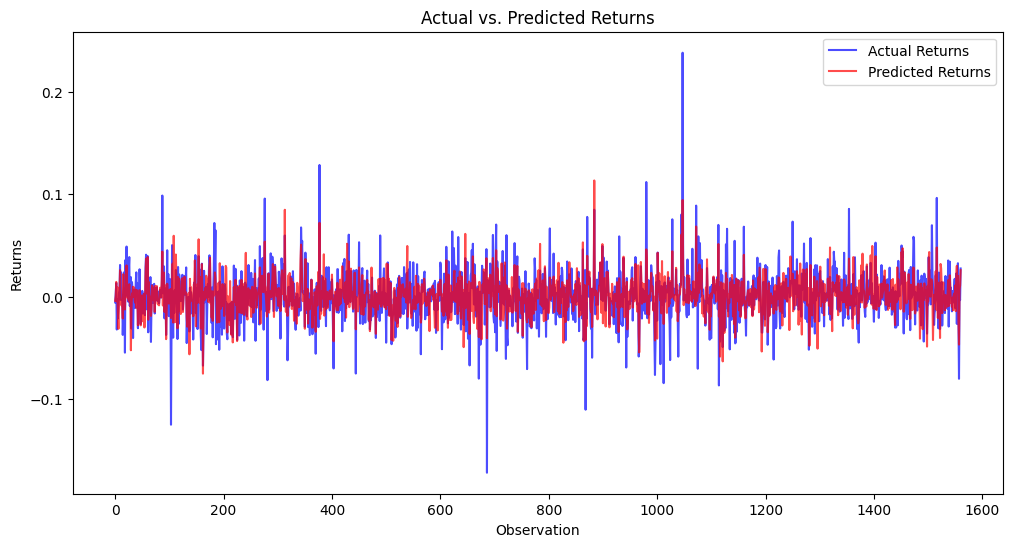

In [20]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual'].values, label='Actual Returns', color='blue', alpha=0.7)
plt.plot(results_df['Predicted'].values, label='Predicted Returns', color='red', alpha=0.7)
plt.title('Actual vs. Predicted Returns')
plt.xlabel('Observation')
plt.ylabel('Returns')
plt.legend()
plt.show()

#### Predictions for the next year

In [27]:
data['date'] = pd.to_datetime(data['date'])

future_dates = pd.date_range(start=data['date'].max() + pd.Timedelta(days=1), periods=252, freq='B')  # 'B' = business days
future_df = pd.DataFrame({'date': future_dates})
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['month'] = future_df['date'].dt.month

# For the other features, use historical mean values as placeholders
for feature in features:
    if feature not in ['day_of_week', 'month']:
        future_df[feature] = data[feature].mean()  # Use historical mean as placeholder

future_df

,date,day_of_week,month,RET_ema_12,RET_ema_26,VOL_CHANGE,BA_SPREAD,DJI_Return,OBV,TURNOVER,is_month_start,is_month_end
0,2023-01-02,0,1,0.001207,0.00126,0.091693,0.001461,0.000364,11.40188,18.984199,0.030746,0.033436
1,2023-01-03,1,1,0.001207,0.00126,0.091693,0.001461,0.000364,11.40188,18.984199,0.030746,0.033436
2,2023-01-04,2,1,0.001207,0.00126,0.091693,0.001461,0.000364,11.40188,18.984199,0.030746,0.033436
3,2023-01-05,3,1,0.001207,0.00126,0.091693,0.001461,0.000364,11.40188,18.984199,0.030746,0.033436
4,2023-01-06,4,1,0.001207,0.00126,0.091693,0.001461,0.000364,11.40188,18.984199,0.030746,0.033436
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023-12-13,2,12,0.001207,0.00126,0.091693,0.001461,0.000364,11.40188,18.984199,0.030746,0.033436
248,2023-12-14,3,12,0.001207,0.00126,0.091693,0.001461,0.000364,11.40188,18.984199,0.030746,0.033436
249,2023-12-15,4,12,0.001207,0.00126,0.091693,0.001461,0.000364,11.40188,18.984199,0.030746,0.033436
250,2023-12-18,0,12,0.001207,0.00126,0.091693,0.001461,0.000364,11.40188,18.984199,0.030746,0.033436


In [28]:
# Predict returns for the next year
future_X = future_df[features]
future_df['Predicted_RET'] = model.predict(future_X)

# Display the first few predicted returns
print(future_df[['date', 'Predicted_RET']].head())


        date  Predicted_RET
0 2023-01-02       0.001784
1 2023-01-03       0.001537
2 2023-01-04       0.001290
3 2023-01-05       0.001043
4 2023-01-06       0.000796
